<a href="https://colab.research.google.com/github/genesisvegag/Receta-para-hit-Spotify/blob/main/Proyecto_Final_Genesis_Vega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final "Receta para un hit en Spotify"


# Sección 1: Presentación del caso

El dataset seleccionado corresponde a las canciones más populares desde el año 2000 hasta el 2019 registradas por la plataforma de streaming de musica Spotify.

 La base de datos muestra las canciones, el artista, junto con los atributos por cada tema como son la medida del tempo, el genero, el nivel de ruido, nivel de acustica y muchos mas.

A esto, las disqueras y artistas se dan a la tarea de conocer cuales pueden ser los proximos hits para el publico. Por lo que en el presente estudio se espera determinar si existe algún patrón que haga a una canción popular y cuales atributos pertenecen al patron.


#Sección 2: Objetivos y preguntas

El objetivo principal del estudio es realizar un análisis de los atributos de las canciones para identificar si existen tendencias y patrones dentro de estos para contestar a la pregunta: ¿qué atributos comparten las canciones más populares?

Las preguntas secundarias que se intentarán responder son:

*   ¿Qué artistas lanzan canciones que se vuelven populares?
*   ¿Cuáles son los géneros que más le gustan al público?
*   ¿La duración de una canción importa en el rendimiento de las listas populares de canciones?
*   ¿Qué atributos de canciones se correlacionan con el éxito?



#Sección 3: Metadata
El dataset es un conjunto de datos por Mark Koveha. Es un dataset publico disponible en Kaggle en el siguiente [link](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019).
Las columnas de datos son las siguientes:
1. **`artist`**: Nombre del Artista.
2. **`song`**: Nombre de la Pista.
3. **`duration_ms`**: Duración de la pista en milisegundos.
4. **`explicit`**: la letra o el contenido de una canción o un video musical contienen uno o más de los criterios que podrían considerarse ofensivos o inadecuados para los niños.
5. **`year`**: Año de lanzamiento de la pista.
6. **`popularity`**: cuanto mayor sea el valor, más popular será la canción.
7. **`danceability`**: la bailabilidad describe qué tan adecuada es una pista para bailar. Un valor de 0 es menos bailable y 1 es más bailable.
8. **`energy`**: La energía es una medida de 0 a 1 y representa una medida perceptible de intensidad y actividad.
9. **`key`**: La clave en la que se encuentra la pista. Los números enteros se asignan a tonos utilizando la notación estándar de clase de tono. P.ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
10. **`loudness`**: El volumen general de una pista en decibelios (dB).
11. **`mode`**: Mode indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.
12. **`speechiness`**: Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más parecida a la voz sea la grabación  más cerca de 1,0 será el valor del atributo.
13. **`acousticness`**: una medida de confianza de 0 a 1 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.
14. **`instrumentalness`**: predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabras habladas son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1 mayor será la probabilidad de que la pista no contenga contenido vocal.
15. **`liveness`**: Detecta la presencia de una audiencia en la grabación. Los valores de vivacidad más altos representan una mayor probabilidad de que la pista se interprete en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.
16. **`valence`**: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enfadadas).
17. **`tempo`**: el tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o ritmo de una pieza dada y se deriva directamente de la duración promedio del tiempo.
18. **`genre`**: Género de la pista.

##3.1 Importación de librerias

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp
from prettytable import PrettyTable

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
!pip install squarify                 # Importar squarify para mapa de arbol
import squarify
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier


# Métricas
# ==============================================================================
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report




##3.2 Dataset

In [ ]:
df = pd.read_csv('/content/songs_normalize.csv')     #leer el archivo .csv para cargar en el notebook
df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


#Sección 4: EDA

In [ ]:
# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)

    t = PrettyTable(['Column',
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                     'Example',
                    ])

    for c in df.columns:
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   df[~df[c].isnull()][c].iloc[0],
                  ])
    print(t)
    print()
    return

df_explore(df)

Shape:  (2000, 18)
+------------------+---------+----------+-------+--------+------------------------+
|      Column      |   Type  | Non-Null | Nulls | Unique |        Example         |
+------------------+---------+----------+-------+--------+------------------------+
|      artist      |  object |   2000   |   0   |  835   |     Britney Spears     |
|       song       |  object |   2000   |   0   |  1879  | Oops!...I Did It Again |
|   duration_ms    |  int64  |   2000   |   0   |  1793  |         211160         |
|     explicit     |   bool  |   2000   |   0   |   1    |         False          |
|       year       |  int64  |   2000   |   0   |   23   |          2000          |
|    popularity    |  int64  |   2000   |   0   |   75   |           77           |
|   danceability   | float64 |   2000   |   0   |  565   |         0.751          |
|      energy      | float64 |   2000   |   0   |  580   |         0.834          |
|       key        |  int64  |   2000   |   0   |   11   

Anteriormente se puede observar que no hay valores nulos por lo que procedemos a checar si hay valores duplicados

In [ ]:
df.duplicated().any()


True

In [ ]:
# Debido a que se confirma que existen duplicados, los eliminamos
df.drop_duplicates(inplace=True)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Lo siguiente a realizar es una conversión del formato de los datos presentados en la columna de duration_ms. Debido a que en el dataframe la duración de las canciones es medida en milisegundos. Nos es más fácil entender su información en segundos.

In [ ]:
# Convertimos la duracion de la cancion de milisegundos a segundos con la formula minutos = milisegundos ÷ 60,000
df['duration_min'] = df["duration_ms"]/60000

# imprimir df con la columna de conversion al final
print (df.duration_min)

0       3.519333
1       2.784433
2       4.175767
3       3.741550
4       3.342667
          ...   
1995    3.017100
1996    2.973767
1997    3.343217
1998    2.850483
1999    3.588000
Name: duration_min, Length: 1941, dtype: float64


##4.1 Estadísticas descriptivas

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1941.0,228594.97,39249.80,113000.00,203506.00,223186.00,247946.00,484146.00
year,1941.0,2009.52,5.88,1998.00,2004.00,2010.00,2015.00,2020.00
popularity,1941.0,59.63,21.50,0.00,56.00,65.00,73.00,89.00
danceability,1941.0,0.67,0.14,0.13,0.58,0.68,0.76,0.98
energy,1941.0,0.72,0.15,0.05,0.62,0.74,0.84,1.00
key,1941.0,5.37,3.62,0.00,2.00,6.00,8.00,11.00
loudness,1941.0,-5.51,1.94,-20.51,-6.49,-5.28,-4.17,-0.28
mode,1941.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
speechiness,1941.0,0.10,0.10,0.02,0.04,0.06,0.13,0.58
acousticness,1941.0,0.13,0.17,0.00,0.01,0.06,0.18,0.98


## 4.2 Análisis Univariado

### 4.2.1 Artist

**¿Qué tipo de artista logra destacar más y producir más hits musicales?**

De acuerdo a la base de datos, el sexo que predomina ligeramente es el masculino dentro de los 10 artistas con más canciones populares. Dentro del grupo de los artistas masculinos más escuchados, se puede decir que la mayoría son raperos y la segunda mayoría son DJs. En cuanto a las artistas femeninas más escuchadas, todas son cantantes.

In [ ]:
# contar cuantos artistas han sido incluidos
df['artist'].nunique ()

835

In [ ]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(10),x='artist',y='song',labels={'song':'Canciones'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> Artistas con las más canciones populares en Spotify')

### 4.2.2 Duration

Debe de haber un balance en la duracion de una canción popular ya que no puede ser muy larga o muy corta. La mediana de la duracion de las canciones es de 3.7 minutos. El 50% de las canciones duran entre 3.4 minutos y 4.1 minutos.
De entre los valores atípicos, son más los que superan la mediana.


Se podria considerar que la cancion debe ser lo suficientemente larga para cantar pero no tanto como para tomarse un break de 5 minutos de algo.

In [ ]:
px.box(df,y='duration_min',template='plotly_dark',color_discrete_sequence=['cyan'],title='<b>Duracion de canciones populares')

De igual manera, la tendencia que se puede detectar referente a la duracion de las canciones en el último año es decreciente

In [ ]:
def ms_to_minsec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

durations = df[['duration_ms','year']].groupby('year').mean().reset_index().iloc[2:22]
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)


iplot(px.line(durations,
        x='year',
        y='duration_s',
        title='promedio de la duracion de las canciones a traves de los años',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))

### 4.2.3 Genre

Debido a que el dataframe contiene muchos registros unicos del atributo género musical, filtraremos los registros de género más relevantes para mapear los más frecuentes dentro de las canciones más populares.

In [ ]:
df['genre'].nunique ()

59

Los registros del atributo género son todos los géneros detectados en cada canción por lo que el registro `pop`, `hip hop` y `hip hop, pop` son 3 diferentes géneros en el dataframe.

In [ ]:
# seleccionamos ambos atributos de cancion y genero y agrupamos por genero contando los registros
data_2=df[['song','genre']].groupby(by='genre').count()

#mostrar solo los generos musicales que se presentan en el DF 16 o más veces
df_genre=data_2['song']>=16
filtered_df = data_2[df_genre]
filtered_df.sort_values('song', ascending=False, inplace=True)
print(filtered_df)

                                song
genre                               
pop                              416
hip hop, pop                     267
hip hop, pop, R&B                236
pop, Dance/Electronic            216
pop, R&B                         172
hip hop                          121
hip hop, pop, Dance/Electronic    75
rock                              57
Dance/Electronic                  41
rock, pop                         39
rock, metal                       36
pop, latin                        28
pop, rock                         26
set()                             22


<ipython-input-4-daf5e1c4b679>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Uno de los registros únicos en el atributo genre es set () con 22 resultados lo cual no es un género muscial real por lo que procedemos a filtrarlo fuera del DF

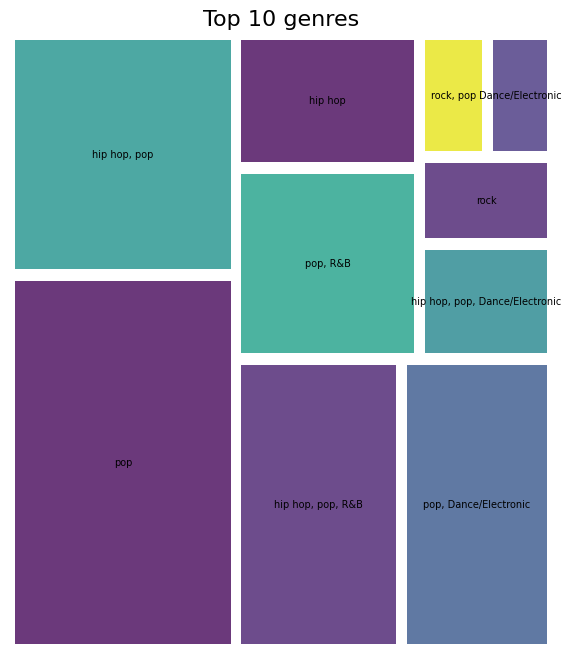

In [ ]:
#Mapa de arbol del top 10 generos musicales mas relevantes en las canciones mas populares
#Con la lista filtrada de generos anterior, se crea mapa de arbol
fig, ax = plt.subplots(1, figsize = (7,8))
squarify.plot(sizes=[416,267,236,216,172,121,75,57,41,39],
              label=["pop", "hip hop, pop", "hip hop, pop, R&B", "pop, Dance/Electronic", "pop, R&B", "hip hop", "hip hop, pop, Dance/Electronic", "rock", "rock, pop", "Dance/Electronic"  ],
              text_kwargs = {'fontsize': 7, 'color': 'black'},
              alpha=.8,
              pad=2)
plt.title("Top 10 genres",fontsize=16)

plt.axis('off')
plt.show()

Varios registros unicos repiten generos musicales dando a entender que una cancion puede contener elementos de diferentes generos.

### 4.2.4 Características Musicales


#### 4.2.4.1 Histórico

Las tendencias de las características musicales de las canciones a través del tiempo sirven para entender los cambios de preferencias en el publico. Esto se puede profundizar segun se estudie los contextos historicos de los promedios de resultados de las variables en cada año.

In [ ]:
# creamos un df donde se filtren las variables que se van a graficar y se calculen sus promedios por año
m1 = df.groupby('year')[['popularity','danceability','speechiness','instrumentalness','valence']].mean()
m1

,popularity,danceability,speechiness,instrumentalness,valence
year,,,,,
1998,49.000000,0.727000,0.291000,0.000000,0.527000
1999,64.921053,0.668974,0.067224,0.009172,0.574008
2000,58.239437,0.690817,0.078725,0.031580,0.649183
2001,59.349057,0.674698,0.107284,0.021742,0.658815
2002,62.104651,0.674128,0.122485,0.010419,0.582988
2003,58.758242,0.666033,0.119910,0.040497,0.613751
2004,58.631579,0.694779,0.124853,0.016009,0.608175
2005,61.663366,0.674020,0.126438,0.018821,0.554990
2006,57.161290,0.663462,0.116104,0.001957,0.601516


Text(0, 0.5, 'Valor')

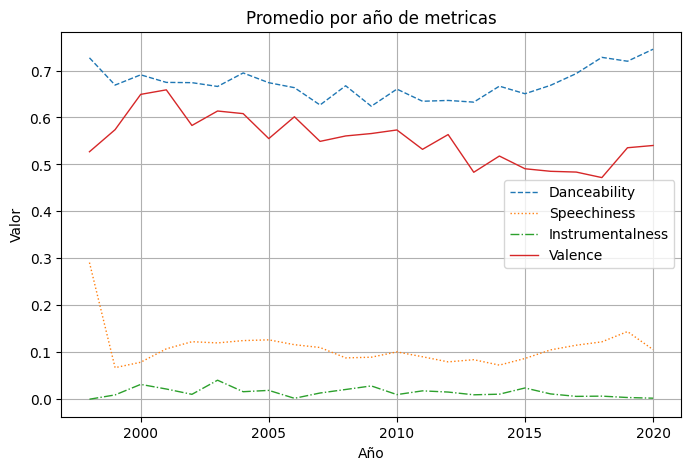

In [ ]:
# graficamos los promedios anteriormente obtenidos
fig,ax= plt.subplots(figsize=(8,5))
ax.plot(m1.index, m1.danceability, label='Danceability',linewidth=1,linestyle='--')
ax.plot(m1.index, m1.speechiness, label='Speechiness',linewidth=1,linestyle=':')
ax.plot(m1.index, m1.instrumentalness, label='Instrumentalness',linewidth=1,linestyle='dashdot')
ax.plot(m1.index, m1.valence, label='Valence',linewidth=1,linestyle='solid')

ax.legend()
ax.grid()
ax.set_title('Promedio por año de metricas')
ax.set_xlabel('Año')
ax.set_ylabel('Valor')

Todas las variables graficadas excepto `instrumentalness` exhiben una tendencia a través de los años

#### 4.2.4.1 Distribución

**¿Cuáles caracterísitcas de canciones pueden ser predecibles acorde a su distribución?**

Las variables de popularidad, bailabilidad y valence se parecen mas a una distribucion normal por lo que seria mas facil de predecir estas caracteristicas en un modelo de prediccion para acertar sobre canciones que se convertiran en hits musicales.

In [ ]:
# Graficar diferentes variables/características musicales para visualizar su distribución
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>popularity', '<i>danceability', '<i>speechiness', '<i>valence'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=2,col=2)
fig.update_layout(height=900,width=900,title_text='<b>Distribución de características')
fig.update_layout(template='plotly_dark',title_x=0.5)

## 4.3 Análisis Bivariado

Características musicales

El determinar la correlación entre los atributos es importante para entender la armonia que debe de persistir en las canciones más populares por lo que hay que graficar diferentes pares de variables para visualizar las tendencias que la componen.

In [ ]:
px.scatter(df,x='valence',y='danceability',color='valence',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Valence vs Danceability')

In [ ]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy vs Danceability')

In [ ]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy vs Loudness')

Las tendencias mostradas son casi visibles en los datos de las graficas anteriores

## 4.4 Análisis Multivariado

Calculamos y graficamos la correlacion entre las variables para entender mejor cómo se involucran unas con otras.

<ipython-input-35-b906bafe61ce>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



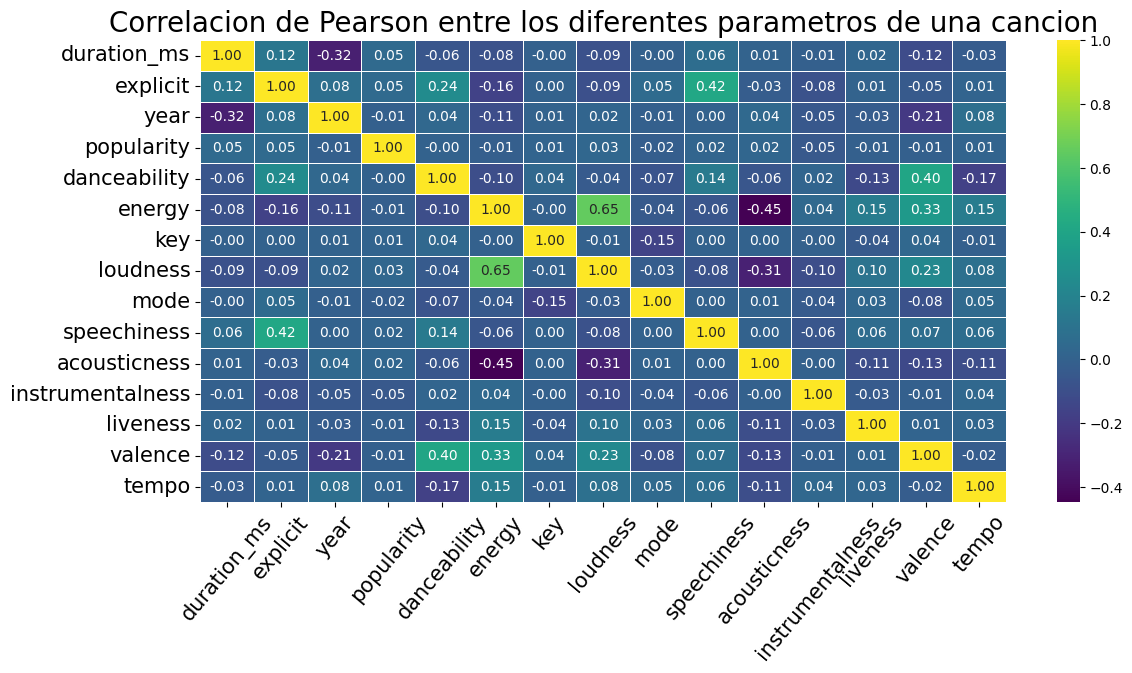

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlacion de Pearson entre los diferentes parametros de una cancion', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

# Sección 5: Observaciones

**Aristas**
De acuerdo a la base de datos, el sexo que predomina ligeramente es el masculino dentro de los 10 artistas con más canciones populares.
Dentro del grupo de los artistas masculinos más escuchados, se puede decir que la mayoría son raperos y la segunda mayoría son DJs. En cuanto a las artistas femeninas más escuchadas, todas son cantantes.

**Atributos de canciones**
1.  'Danceability': la métrica sufrió una ligera disminución a través de los años. Sin embargo, a partir del 2015, está empieza a tener una tendencia creciente.
2.  'Valence': se observa una tendencia decreciente a partir de los inicios de los 2000s para luego iniciar un repunte alrededor del 2018 en camino al 2020.
3. 'Speechiness': muestra un desplome significativo a finales de los 90s, lo cual puede ser explicado por la transición de popularidad del rap y hip hop a canciones con sintetizadores, batería electro-punk, reverb, géneros dubstep y EDM (música electrónica).
4. 'Instrumentalness': La tendencia de los valores son valores menores por lo que indica que las canciones populares siguen siendo más los que la gente puede cantar las letras.

**Género**
Los géneros que más se escuchan en las canciones son pop y hip hop en conjunto con otros más.

**Duración**
Conforme los años pasan, la duracion de las canciones va a la baja.


# Sección 6: Dataset final para analizar

Gran parte de la identificación de una canción es su genero musical por lo que se enfocara en prepara el DF para aplicar modelos de ML al genero.

## 6.1 Feature Engineering

Crearemos un nuevo dataframe donde este apropiadamente preparado el atributo `genre` para que sea optimo entrenar un modelo de ML y predecir el género de una canción

In [ ]:
# Filtrar el dataframe con los generos que comparten al menos 10 canciones contando su frecuencia y añadiendo la columna
count_freq = dict(df['genre'].value_counts())
df['count_freq'] = df['genre']
df['count_freq'] = df['count_freq'].map(count_freq)
df2 = df[df.count_freq>=10]
df2

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,count_freq
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333,416
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433,39
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550,36
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667,416
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B",4.228883,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.000000,0.1110,0.175,150.231,hip hop,2.916000,121
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3.017100,416
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2.973767,416
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2.850483,416


In [ ]:
# se divide la columna de genre en distintas columnas donde se pueda apreciar indivdualmente los generos que componen la cancion
df2["genre"].str.split(",", expand=True)

,0,1,2
0,pop,None,None
1,rock,pop,None
3,rock,metal,None
4,pop,None,None
5,hip hop,pop,R&B
...,...,...,...
1994,hip hop,None,None
1995,pop,None,None
1996,pop,None,None
1998,pop,None,None


In [ ]:
# se agregan las columnas creadas de cada genero musical en el data frame
df2

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,count_freq
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333,416
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433,39
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550,36
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667,416
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.1190,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B",4.228883,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.000000,0.1110,0.175,150.231,hip hop,2.916000,121
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3.017100,416
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2.973767,416
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2.850483,416


In [ ]:
# Listar los registros unicos
df2['genre']. unique()

array(['pop', 'rock, pop', 'rock, metal', 'hip hop, pop, R&B', 'hip hop',
       'pop, rock', 'pop, R&B', 'Dance/Electronic',
       'pop, Dance/Electronic', 'hip hop, pop', 'R&B', 'pop, latin',
       'rock', 'pop, rock, metal', 'set()', 'hip hop, pop, latin',
       'hip hop, Dance/Electronic', 'latin',
       'pop, rock, Dance/Electronic', 'hip hop, pop, Dance/Electronic'],
      dtype=object)

## 6.2 Label Encoding

A las variables categoricas les asignamos un valor numérico a fin de poder aplicar los modelos de ML.

In [ ]:
df3 = df2.assign(genre=df['genre'].str.split(',')).explode('genre')
df3["genre"] = df3.apply(lambda x: x["genre"].strip(), axis=1)


In [ ]:
df3.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,count_freq
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop,3.519333,416
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,rock,2.784433,39
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.612,0.684,148.726,pop,2.784433,39
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.347,0.544,119.992,rock,3.741550,36
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.347,0.544,119.992,metal,3.741550,36


In [ ]:
#hacer columnas de género codificadas y columnas explícitas
df_pivot = df3.pivot(columns="genre", values="song")
df_pivot

genre,Dance/Electronic,R&B,hip hop,latin,metal,pop,rock,set()
0,NaN,NaN,NaN,NaN,NaN,Oops!...I Did It Again,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,All The Small Things,All The Small Things,NaN
3,NaN,NaN,NaN,NaN,It's My Life,NaN,It's My Life,NaN
4,NaN,NaN,NaN,NaN,NaN,Bye Bye Bye,NaN,NaN
5,NaN,Thong Song,Thong Song,NaN,NaN,Thong Song,NaN,NaN
...,...,...,...,...,...,...,...,...
1994,NaN,NaN,Goodbyes (Feat. Young Thug),NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,Sucker,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,Cruel Summer,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,Dancing With A Stranger (with Normani),NaN,NaN


In [ ]:
for i in df_pivot.columns:
    df_pivot.loc[~(df_pivot[i].isnull()), i] = 1
    df_pivot.loc[(df_pivot[i].isnull()), i] = 0

In [ ]:
for i in df_pivot.columns:
     df_pivot[i] = df_pivot[i].astype('category')

In [ ]:
df_pivot.head()

genre,Dance/Electronic,R&B,hip hop,latin,metal,pop,rock,set()
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0
3,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,0
5,0,1,1,0,0,1,0,0


In [ ]:
# hacemos copia para juntar el dataframe con los generos en columna
df_son = df.copy()
df_son.drop("genre",axis=1,inplace=True)
df_son = df_son.join(df_pivot)
# eliminar registros con valores NaN
df4 = df_son.dropna()

In [ ]:
df4.head ()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,duration_min,count_freq,Dance/Electronic,R&B,hip hop,latin,metal,pop,rock,set()
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,3.519333,416,0,0,0,0,0,1,0,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,2.784433,39,0,0,0,0,0,1,1,0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,3.741550,36,0,0,0,0,1,0,1,0
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,3.342667,416,0,0,0,0,0,1,0,0
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,...,4.228883,236,0,1,1,0,0,1,0,0


In [ ]:
# quitar columnas de artista y cancion, convertir la columna explicito a 1 o 0
df5 = df4.drop(["artist","song"],axis=1)
df5["explicit"] = np.where(df5["explicit"]==True, 1, 0)
df5.head(5)

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,duration_min,count_freq,Dance/Electronic,R&B,hip hop,latin,metal,pop,rock,set()
0,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,...,3.519333,416,0,0,0,0,0,1,0,0
1,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,...,2.784433,39,0,0,0,0,0,1,1,0
3,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,...,3.741550,36,0,0,0,0,1,0,1,0
4,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,...,3.342667,416,0,0,0,0,0,1,0,0
5,253733,1,1999,69,0.706,0.888,2,-6.959,1,0.0654,...,4.228883,236,0,1,1,0,0,1,0,0


#Sección 7: Fase de Modelling


## 7.1 Train & Test Split

In [ ]:
# separamos las caracteristicas/features del target
X = df5.drop("pop",axis=1) #variables que utilizara para encontrar el patron por el cual un algoritmo encuentra esos factores por el
# una persona compra un producto financiero o NO.
y = df5["pop"] #variables objetivo

In [ ]:
# train test split
# Separamos el dataset, creamos y ejecutamos el modelo
#Me quedo con 20% para test y 80% para train

x_train, x_test,y_train,y_test = train_test_split(X.values,y,test_size =0.2,random_state=42)


print('Tamaño del set de entrenamiento:', x_train.shape)
print('Tamaño del set de testeo:', x_test.shape)

Tamaño del set de entrenamiento: (1468, 24)
Tamaño del set de testeo: (367, 24)


## 7.2 Creacion de modelos: RandomForest y KNN

In [ ]:
#Creamos distintos modelos para probar las predicciones y elegir uno

#KNN con n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=2)

#Random Forest con 200 árboles
random_forest = RandomForestClassifier(random_state=11, n_estimators=200)

In [ ]:
#Entrenamos los modelos

KNN=knn.fit(X_train, y_train) #knn
RF=random_forest.fit(X_train, y_train) #random forest

In [ ]:
#Predicción de los modelos en train y test

#knn
KNN_Predictions_train = knn.predict(X_train)
KNN_Predictions = knn.predict(X_test)

#random forest
RF_Predictions_train = random_forest.predict(X_train)
RF_Predictions = random_forest.predict(X_test)

## 7.3. Metricas de modelos: RandomForest y KNN

In [ ]:
#Calculamos el accuracy en Train y Test de todos los modelos
train_accuracy_knn = round(accuracy_score(y_train, KNN_Predictions_train),2)
test_accuracy_knn = round(accuracy_score(y_test, KNN_Predictions),2)

print('KNN')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_knn)
print('% de aciertos sobre el set de evaluación:',test_accuracy_knn)
print('\n')

train_accuracy_random_forest = accuracy_score(y_train, RF_Predictions_train)
test_accuracy_random_forest = accuracy_score(y_test, RF_Predictions)

print('Random Forest')
print('% de aciertos sobre el set de entrenamiento:', train_accuracy_random_forest)
print('% de aciertos sobre el set de evaluación:',test_accuracy_random_forest)

KNN
% de aciertos sobre el set de entrenamiento: 0.86
% de aciertos sobre el set de evaluación: 0.63


Random Forest
% de aciertos sobre el set de entrenamiento: 0.9993188010899182
% de aciertos sobre el set de evaluación: 0.8446866485013624


In [ ]:
#Aplicamos cross validation
from sklearn.model_selection import cross_val_score
print("Cross Validation KNN: ",cross_val_score(KNN,X_train,y_train).mean())
print("Cross Validation Random Forest: ",cross_val_score(RF,X_train,y_train).mean())

Cross Validation KNN:  0.6131503796057672
Cross Validation Random Forest:  0.8181235634185414


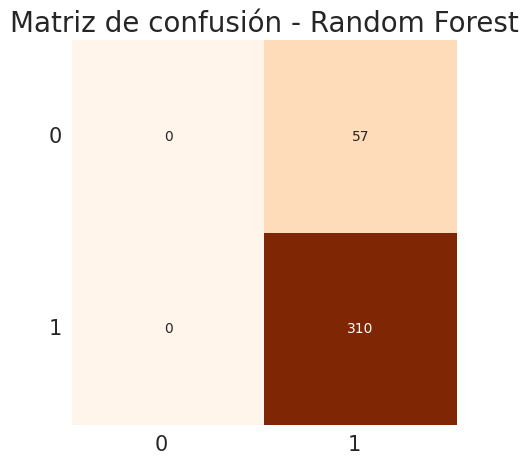

In [ ]:
# Matriz de confusión - Random Forest
cm_t = confusion_matrix(y_test, RF_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t,
                     square=True,
                     cmap="Oranges",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - Random Forest',fontsize = 20)
plt.show()

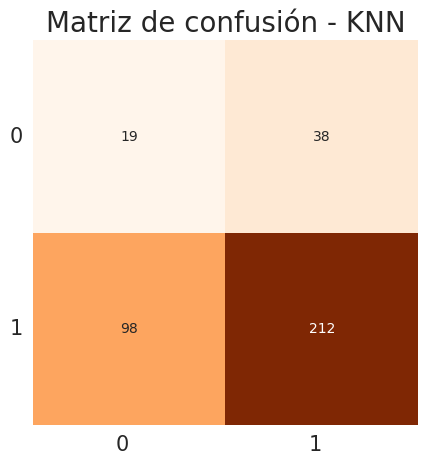

In [ ]:
# Matriz de confusión - KNN
cm_t = confusion_matrix(y_test, KNN_Predictions)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm_t,
                     square=True,
                     cmap="Oranges",
                     annot=True,
                     fmt="d",
                     cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right',fontsize = 15)
plt.title('Matriz de confusión - KNN',fontsize = 20)
plt.show()

In [ ]:
#Evaluamos otras métricas del modelo (precision, recall, AUC)
print("Random Forest -> ", "Accuracy: ", round(accuracy_score(y_test, RF_Predictions),2), "Precision: ", round(precision_score(y_test, RF_Predictions),2), "Recall: ", round(recall_score(y_test, RF_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_Predictions),2))
print("KNN -> ", "Accuracy: ", round(accuracy_score(y_test, KNN_Predictions),2), "Precision: ", round(precision_score(y_test, KNN_Predictions),2), "Recall: ", round(recall_score(y_test, KNN_Predictions),2),"AUC:",round(roc_auc_score(y_test, KNN_Predictions),2))


Random Forest ->  Accuracy:  0.84 Precision:  0.84 Recall:  1.0 AUC: 0.5
KNN ->  Accuracy:  0.63 Precision:  0.85 Recall:  0.68 AUC: 0.51


**Conclusión: De acuerdo a las métricas el Random Forest resulta ser el mejor modelo a elegir para este caso**



#Sección 8: Optimizacion

Hyperparameter Optimization: Partiendo del modelo que mejor se adapta a los datos (Random Forest) intentaremos ajustar sus parámetros para conocer si es posible mejorar su precisión.



In [ ]:
# Numero de Árboles del Random Forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num =5)]
# Numero de caracterísiticas a considerar en cada split
max_features = ['auto', 'sqrt']
# Número máximo de niveles por Arbol.
max_depth = [2,5]
# Número mínimo de muestras necesarias para dividir un nodo.
min_samples_split = [2,5]
# Número mínimo de muestras necesarias en cada nodo hoja.
min_samples_leaf = [2,5]
# Método de selección de muestras para entrenar cada árbol.
bootstrap = [True, False]

In [ ]:
# Creamos grilla de parámetros
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Realizamos el Grid Search CV
RF_grid = GridSearchCV(RF, param_grid, cv = 5, n_jobs = -1, scoring = 'precision')

#Entrenamos
RF_grid.fit(X_train,y_train)

#Devolvemos los mejores parámetros a utilizar
print("Best parameters: ")
print(RF_grid.best_params_)

Best parameters: 
{'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



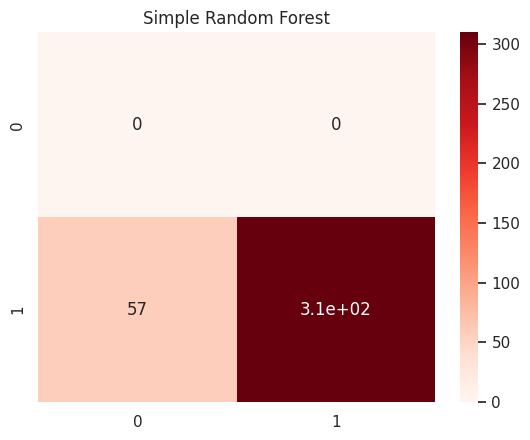

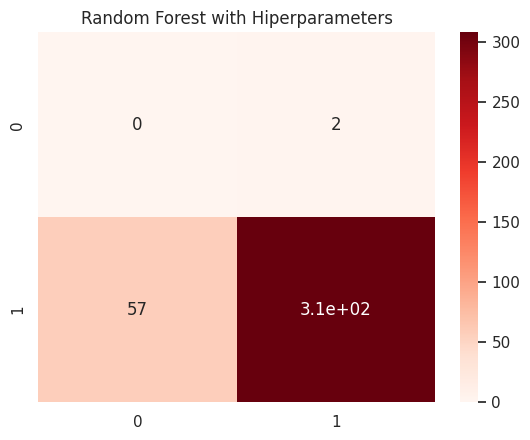

In [ ]:
RF_grid_Predictions = RF_grid.predict(X_test)

#Obtención de la matriz
arrayRF = confusion_matrix(RF_Predictions, y_test)
arrayRFGrid = confusion_matrix(RF_grid_Predictions, y_test)
df_cmRF = pd.DataFrame(arrayRF)
df_cmRFGrid = pd.DataFrame(arrayRFGrid)

#Representación de la matriz de confusión
sns.set(font_scale=1)
plt.title('Simple Random Forest')
plt.show(sns.heatmap(df_cmRF, annot=True, cmap = 'Reds'))
plt.title('Random Forest with Hiperparameters')
plt.show(sns.heatmap(df_cmRFGrid, annot=True , cmap = 'Reds'))

In [ ]:
#Comparamos las métricas del random forest inicial con el optimizado mediante GridSearchCV
print("Random Forest Grid -> ", "Accuracy: ", round(accuracy_score(y_test, RF_grid_Predictions),2), "Precision: ", round(precision_score(y_test, RF_grid_Predictions),2), "Recall: ", round(recall_score(y_test, RF_grid_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_grid_Predictions),2))
print()
print("Random Forest -> ", "Accuracy: ", round(accuracy_score(y_test, RF_Predictions),2), "Precision: ", round(precision_score(y_test, RF_Predictions),2), "Recall: ", round(recall_score(y_test, RF_Predictions),2),"AUC:",round(roc_auc_score(y_test, RF_Predictions),2))


Random Forest Grid ->  Accuracy:  0.84 Precision:  0.84 Recall:  0.99 AUC: 0.5

Random Forest ->  Accuracy:  0.84 Precision:  0.84 Recall:  1.0 AUC: 0.5


Se puede observar que el modelo optimizado tuvo practicamente los mismos resultados excepto por un incremento de 0.01 en recall por lo que se determina que no hay una diferencia significativa.

